In [1]:
import cmdstanpy as csp

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_all = pd.read_csv("linear-data.csv")

In [3]:
N = data_all.shape[0]

log_minchi2 = np.log(data_all["minchi2"])
z_sigma = data_all["z_sigma"]
median_z = data_all["median_z"]

In [4]:
data = {'N': N, 
        'log_minchi2': log_minchi2,
        'z_sigma': z_sigma,
        'median_z': median_z,}

In [5]:
model = csp.CmdStanModel(stan_file = 'linear-regression.stan')
sample = model.sample(data = data, seed = 1, chains = 1,
                      iter_sampling = 1000, iter_warmup = 1000,
                      show_progress = False, show_console = False)

13:10:06 - cmdstanpy - INFO - No CmdStan installation found.
13:10:06 - cmdstanpy - INFO - Cannot determine whether version is before 2.27.
13:10:06 - cmdstanpy - INFO - No CmdStan installation found.
13:10:06 - cmdstanpy - INFO - Cannot determine whether version is before 2.27.


ValueError: No CmdStan installation found, run command "install_cmdstan"or (re)activate your conda environment!

In [17]:
beta_0_list = sample.stan_variable("beta_0")
beta_1_list = sample.stan_variable("beta_1")
beta_2_list = sample.stan_variable("beta_2")
sigma_list = sample.stan_variable("sigma")

In [18]:
prior_pred_med_z = beta_0_list + beta_1_list*log_minchi2[0] + beta_2_list*z_sigma[0]

Text(0, 0.5, 'Beta_1')

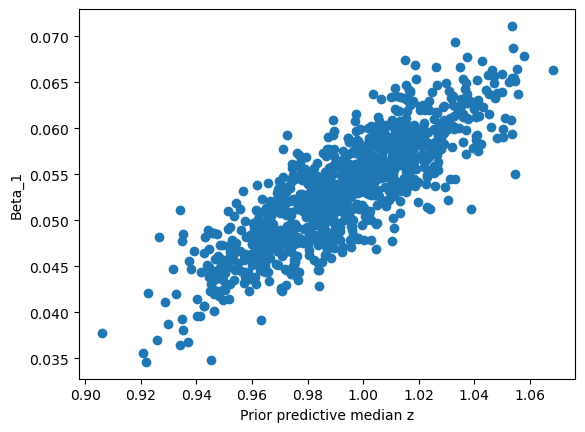

In [27]:
plt.scatter(prior_pred_med_z, beta_1_list)
plt.xlabel("Prior predictive median z")
plt.ylabel("Beta_1")

Text(0, 0.5, 'Beta_2')

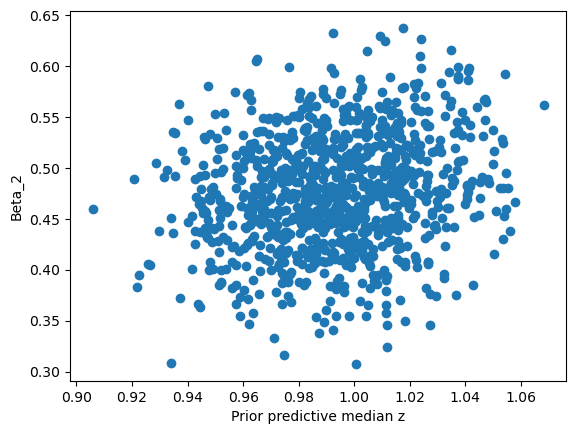

In [30]:
plt.scatter(prior_pred_med_z, beta_2_list)
plt.xlabel("Prior predictive median z")
plt.ylabel("Beta_2")